In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

%matplotlib inline

# A look at the data

In [2]:
# Options for printing more columns when calling head for a dataframe

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [3]:
listings_df = pd.read_csv("./Data/listings.csv")
print(listings_df.shape)
listings_df.head()

(3818, 92)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [4]:
# Check for missing values in price column
listings_df["price"].isnull().mean()

0.0

In [5]:
listings_df.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [6]:
# Columns with the most missing values
most_missing_cols = listings_df.columns[listings_df.isnull().mean() > 0.75]
most_missing_cols

Index(['square_feet', 'license'], dtype='object')

In [7]:
listings_df[['square_feet', 'license']].isnull().mean()

square_feet    0.974594
license        1.000000
dtype: float64

In [8]:
# we are confortable in dropping those two columns in particular, as the number of missing values is huge
# compared to the total number of rows

In [9]:
# Check the % of missing values in other columns
# Sort by largest to smallest
listings_df.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
reviews_per_month                   0.164222
first_review                        0.164222
last_review                         0.164222
space                               0.149031
host_respo

In [10]:
listings_df["neighbourhood_group_cleansed"].isnull().mean()

0.0

Since there is already an cleansed column for the neighborhood, we are confident in droping uncleansed one.

In [11]:
listings_df["experiences_offered"].unique()

array(['none'], dtype=object)

Even though "experiences_offered" seems to have no missing value, it turns out that there is no usefull information in this column. So, we will drop this column as well. 

In [12]:
#Other Variables I could drop.
listings_df.drop(["square_feet", "license", "neighbourhood", "listing_url", "scrape_id"
                 ,"last_scraped", "host_id", "host_url", "host_name", "host_since"
                 ,"host_location", "host_about", "host_thumbnail_url","host_picture_url"
                 ,"host_neighbourhood", "name", "summary", "space", "experiences_offered"
                 ,"thumbnail_url", "neighborhood_overview", "notes", "transit", "medium_url"
                 ,"picture_url", "xl_picture_url", "host_verifications", "street"
                 ,"state", "zipcode", "market", "smart_location", "country_code"
                 ,"country", "latitude", "longitude", "amenities", "security_deposit"
                 ,"cleaning_fee", "extra_people", "weekly_price", "monthly_price", "calendar_updated"
                 ,"has_availability", "calendar_last_scraped", "first_review", "last_review"
                 ,"requires_license", "jurisdiction_names", "description", "city", "host_has_profile_pic"
                 ,"require_guest_profile_picture", "require_guest_phone_verification"
                 ,"host_acceptance_rate"], axis=1, inplace=True)
listings_df.shape

(3818, 37)

In [13]:
listings_df.head()

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
0,241032,within a few hours,96%,f,3.0,3.0,t,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$85.00,2,1,365,14,41,71,346,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,2,4.07
1,953595,within an hour,98%,t,6.0,6.0,t,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,$150.00,1,2,90,13,13,16,291,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,6,1.48
2,3308979,within a few hours,67%,f,2.0,2.0,t,West Queen Anne,Queen Anne,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,$975.00,10,4,30,1,6,17,220,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,2,1.15
3,7421966,NaN,NaN,f,1.0,1.0,t,West Queen Anne,Queen Anne,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,$100.00,1,1,1125,0,0,0,143,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,1,NaN
4,278830,within an hour,100%,f,2.0,2.0,t,West Queen Anne,Queen Anne,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,$450.00,6,1,1125,30,60,90,365,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,1,0.89


In [14]:
pd.concat([listings_df.isnull().mean().sort_values(ascending=False), listings_df.dtypes], axis=1).sort_values(by=0, ascending=False)

,0,1
review_scores_checkin,0.172342,float64
review_scores_accuracy,0.172342,float64
review_scores_value,0.171818,float64
review_scores_location,0.171556,float64
review_scores_cleanliness,0.171032,float64
review_scores_communication,0.170508,float64
review_scores_rating,0.169460,float64
reviews_per_month,0.164222,float64
host_response_rate,0.136983,object
host_response_time,0.136983,object


In [15]:
# Fix price column - Convert it to float
listings_df["price"] = listings_df["price"].replace('[\$,]', '', regex=True).astype(float)

In [16]:
listings_df[["room_type", "property_type"]][listings_df["property_type"].isnull()]

,room_type,property_type
2184,Entire home/apt,NaN


In [17]:
listings_df["property_type"][listings_df["room_type"]=="Entire home/apt"].mode()

0    Apartment
dtype: object

In [18]:
listings_df["property_type"][listings_df["property_type"].isnull()] = "Apartment"

/Applications/Anaconda4.3.1/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [19]:
listings_df[listings_df["beds"].isnull()]

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
1961,609252,within an hour,100%,f,2.0,2.0,t,Greenwood,Other neighborhoods,t,House,Private room,4,NaN,1.0,NaN,Real Bed,280.0,1,1,1125,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,2,NaN


In [20]:
listings_df["host_response_rate"] = listings_df["host_response_rate"].str.rstrip("%").astype("float") / 100.0

In [21]:
listings_df.select_dtypes(include=['O']).columns

Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [22]:
listings_df.shape

(3818, 37)

In [23]:
listings_df.dropna(axis=0).shape

(2834, 37)

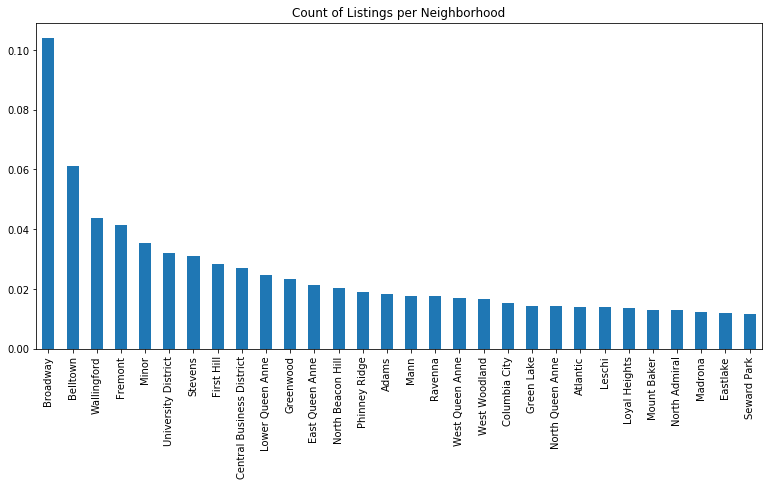

In [24]:
# Top Neighborhoods in terms of listings
top_neigh = listings_df["neighbourhood_cleansed"].value_counts()/listings_df["neighbourhood_cleansed"].value_counts().sum()

# Top 20
top_neigh[:30].plot(kind="bar", legend=None, figsize=(13,6));
plt.title("Count of Listings per Neighborhood");

In [25]:
top_neigh[:30].sum()

0.7467260345730747

In [26]:
listings_df["review_scores_location"].isnull().mean()

0.1715557883708748

In [27]:
# Average User's Ratings per Neighborhood
Avg_LocationRating_per_Neighborhood = listings_df[["neighbourhood_cleansed", "review_scores_location"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="review_scores_location", ascending=False)

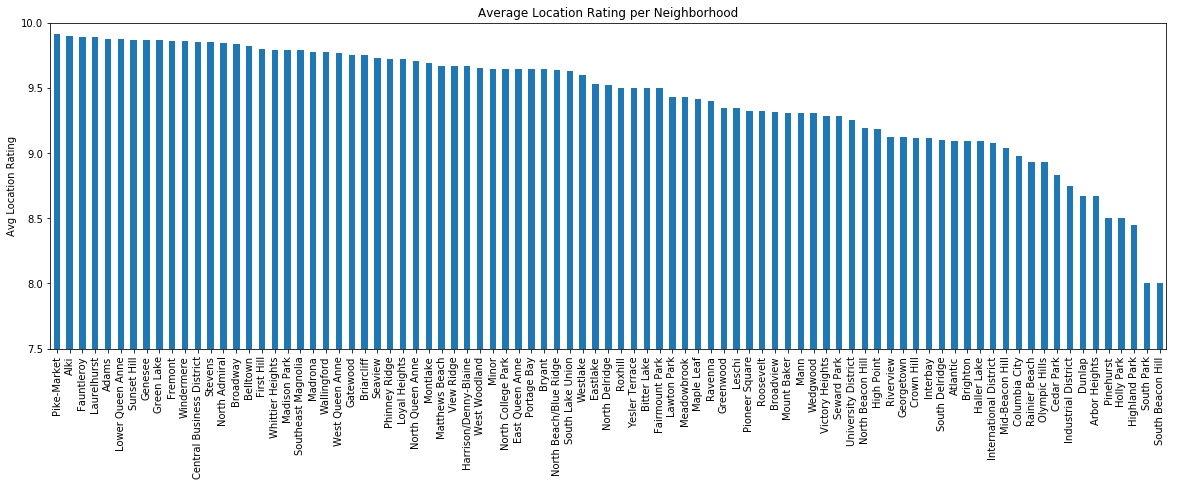

In [28]:
Avg_LocationRating_per_Neighborhood.plot(kind="bar", legend=None, figsize=(20,6));
plt.title("Average Location Rating per Neighborhood");
plt.ylim(7.5, 10);
plt.xlabel("");
plt.ylabel("Avg Location Rating");

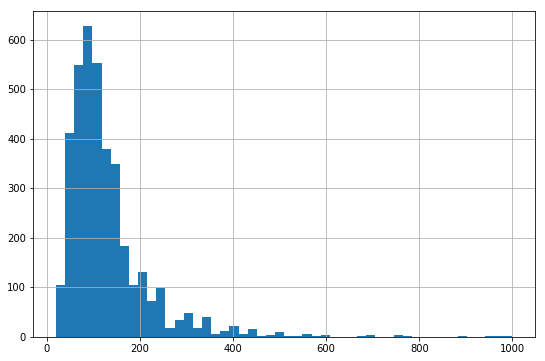

In [29]:
plt.figure(figsize=(9, 6));
listings_df["price"].hist(bins=50);

## Questions:
 1. a. Which are the most ecxpensive and most cheap neighborhoods?
 1. b. %price difference from the overall average price per neighborhood.
 2. What types of properties are mostly available in Seattle?
 3. What factors drive the listing price most?

# Question 1

In [30]:
# Average Price per Neighborhood
Avg_Price_per_Neighborhood = listings_df[["neighbourhood_cleansed", "price"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="price", ascending=False)

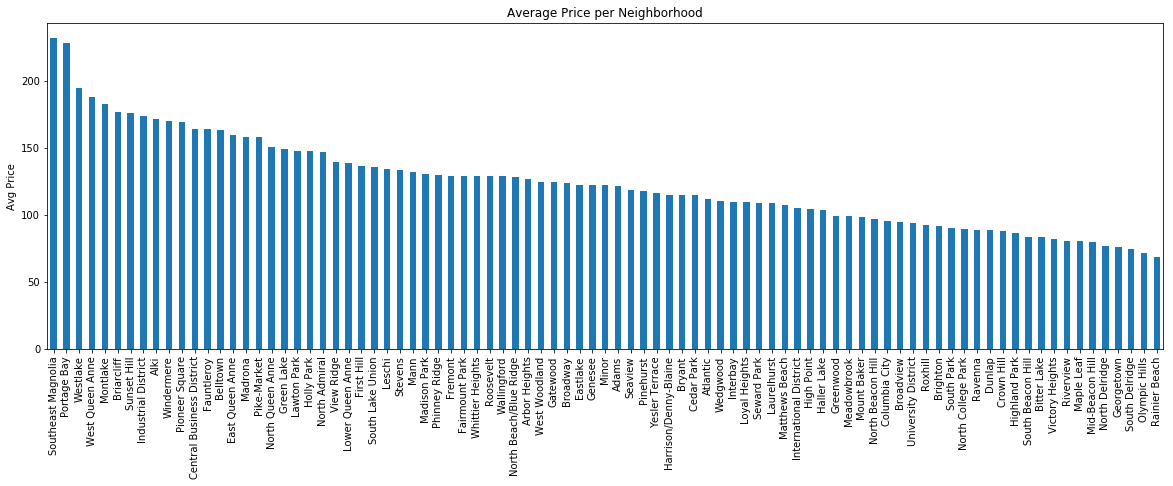

In [31]:
Avg_Price_per_Neighborhood.plot(kind="bar", legend=None, figsize=(20,6));
plt.title("Average Price per Neighborhood");
plt.xlabel("");
plt.ylabel("Avg Price");

In [32]:
Avg_Price_per_Neighborhood["%diff from Overall Avg Price"] = (Avg_Price_per_Neighborhood["price"]-listings_df["price"].mean()) / listings_df["price"].mean()
Avg_Price_per_Neighborhood

,price,%diff from Overall Avg Price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,0.810539
Portage Bay,227.857143,0.780465
Westlake,194.470588,0.519584
West Queen Anne,187.769231,0.467220
Montlake,182.789474,0.428309
Briarcliff,176.571429,0.379721
Sunset Hill,176.055556,0.375690
Industrial District,173.333333,0.354419
Alki,171.619048,0.341024


In [33]:
# Top & Bottom 10 neighborhoods
pd.concat([Avg_Price_per_Neighborhood[:10], Avg_Price_per_Neighborhood[-10:]], axis=0)

,price,%diff from Overall Avg Price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,0.810539
Portage Bay,227.857143,0.780465
Westlake,194.470588,0.519584
West Queen Anne,187.769231,0.467220
Montlake,182.789474,0.428309
Briarcliff,176.571429,0.379721
Sunset Hill,176.055556,0.375690
Industrial District,173.333333,0.354419
Alki,171.619048,0.341024


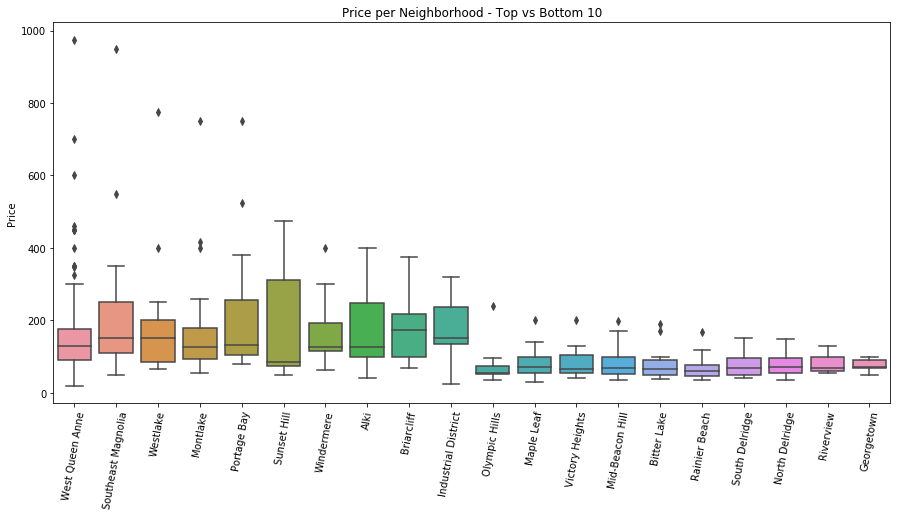

In [34]:
top_bottom = list(Avg_Price_per_Neighborhood.index[:10]) + list(Avg_Price_per_Neighborhood.index[-10:])
top_bottom_plt = listings_df[["neighbourhood_cleansed", "price"]][listings_df["neighbourhood_cleansed"].isin(top_bottom)]
top_bottom_plt = top_bottom_plt.sort_values(by=["price"], ascending=False)

plt.figure(figsize=(15, 7));
sns.boxplot(x="neighbourhood_cleansed", y="price", data=top_bottom_plt);
plt.xticks(rotation=80);
plt.title("Price per Neighborhood - Top vs Bottom 10");
plt.xlabel("");
plt.ylabel("Price");

# Question 2

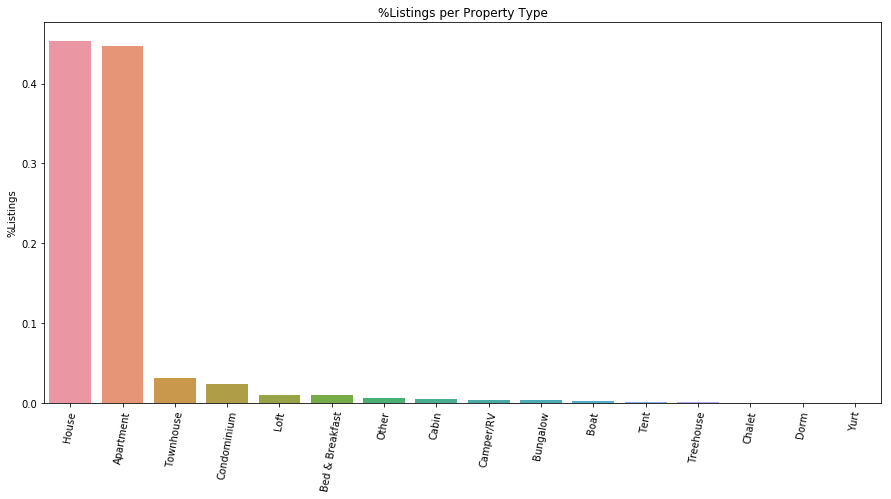

In [35]:
# Available listings by property type
listings_per_prop_type = listings_df["property_type"].value_counts()/listings_df["property_type"].value_counts().sum()
listings_per_prop_type = listings_per_prop_type.reset_index()
listings_per_prop_type.columns = ["property_type", "%Listings"]

# Plot them
plt.figure(figsize=(15, 7));
sns.barplot(x="property_type", y="%Listings", data=listings_per_prop_type);
plt.xticks(rotation=80);
plt.title("%Listings per Property Type");
plt.xlabel("");

/Applications/Anaconda4.3.1/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Applications/Anaconda4.3.1/anaconda/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


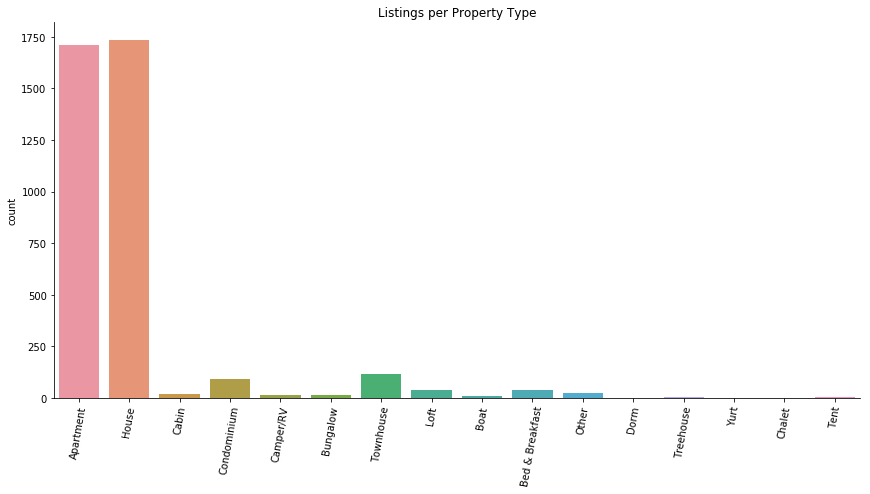

In [36]:
sns.factorplot("property_type", data=listings_df, kind='count', size=6, aspect=2);
plt.xticks(rotation=80);
plt.title("Listings per Property Type");
plt.xlabel("");

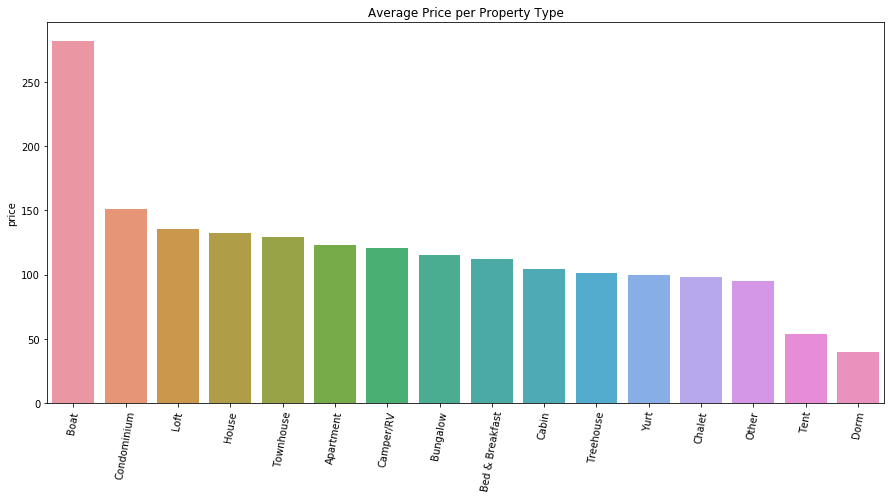

In [37]:
# Average price per Property Type
Avg_Price_Apmt_vs_House = listings_df[["property_type", "price"]].\
    groupby(["property_type"]).mean().\
    sort_values(by="price", ascending=False).\
    reset_index()
    
# Plot them
plt.figure(figsize=(15, 7));
sns.barplot(x="property_type", y="price", data=Avg_Price_Apmt_vs_House);
plt.xticks(rotation=80);
plt.title("Average Price per Property Type");
plt.xlabel("");

In [38]:
Avg_Price_Apmt_vs_House

,property_type,price
0,Boat,282.375000
1,Condominium,151.109890
2,Loft,135.700000
3,House,132.351414
4,Townhouse,129.457627
5,Apartment,122.930954
6,Camper/RV,120.461538
7,Bungalow,115.615385
8,Bed & Breakfast,112.054054
9,Cabin,104.666667


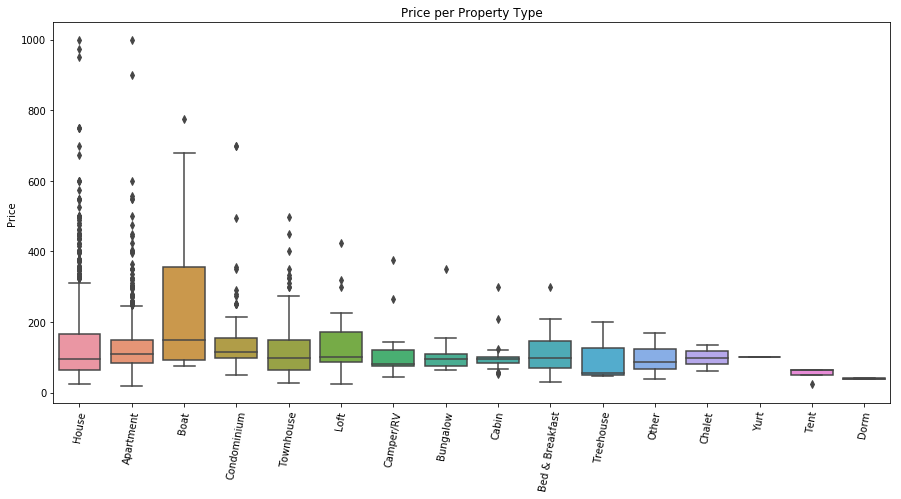

In [39]:
prop_type_plt = listings_df[["property_type", "price"]]
prop_type_plt = prop_type_plt.sort_values(by=["price"], ascending=False)

plt.figure(figsize=(15, 7));
sns.boxplot(x="property_type", y="price", data=prop_type_plt);
plt.xticks(rotation=80);
plt.title("Price per Property Type");
plt.xlabel("");
plt.ylabel("Price");

# Question 3 - Regression and coefficients


1. Create dummies
2. drop nas (?)
3. train test split
4. fit with normalization
5. predict and evaluate
6. print sorted coeffs

In [54]:
def clean_data(df):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no price
    2. Create X as all the columns that are not the price column
    3. Create y as the price column
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    df_new = df.dropna(subset=["price"], axis=0).copy()
    
    X = df_new.drop(["price"], axis=1)
    y = df_new["price"]
    
    num_vars = X.select_dtypes(include=["float", "int"]).columns
    cat_vars = X.select_dtypes(include=["object"]).columns
    
    for num_var in num_vars:
        X[num_var].fillna((X[num_var].mean()), inplace=True)
    
    #for cat_var in cat_vars:
    #    X = pd.concat([X.drop(cat_var, axis=1),\
    #                   pd.get_dummies(X[cat_var], prefix=cat_var, prefix_sep="_", drop_first=True)],\
    #                  axis=1)
    
    X = X[num_vars]
    
    
    return X, y

In [55]:
#Use the function to create X and y
X, y = clean_data(listings_df)

In [56]:
print(X.shape)
print()
print(y.shape)

(3818, 25)

(3818,)


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

lm_model = LinearRegression(normalize=True) # Instantiate
lm_model.fit(X_train, y_train) #Fit
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test)
"The r-squared score for the linear model was {} on {} test values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the linear model was 0.5219413410804012 on 1146 test values.'

In [58]:
y_train_preds = lm_model.predict(X_train)
"The r-squared score for the linear model was {} on {} train values.".format(r2_score(y_train, y_train_preds), len(y_train))

'The r-squared score for the linear model was 0.5008139677321606 on 2672 train values.'

In [59]:
def coef_weights(coefficients, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    coefs_df = pd.DataFrame()
    coefs_df['est_int'] = X_train.columns
    coefs_df['coefs'] = lm_model.coef_
    coefs_df['abs_coefs'] = np.abs(lm_model.coef_)
    coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
    return coefs_df

In [60]:
#pd.options.display.float_format = '{:,.2f}'.format
#pd.set_eng_float_format(accuracy=3, use_eng_prefix=True)

In [61]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head(10)

,est_int,coefs,abs_coefs
5,bathrooms,27.687797,27.687797
6,bedrooms,18.894432,18.894432
4,accommodates,17.479397,17.479397
22,review_scores_value,-16.583299,16.583299
21,review_scores_location,13.653112,13.653112
1,host_response_rate,-10.898312,10.898312
17,review_scores_accuracy,6.139206,6.139206
18,review_scores_cleanliness,5.589446,5.589446
19,review_scores_checkin,-5.579392,5.579392
24,reviews_per_month,-4.208529,4.208529
